In [1]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import metrics
import numpy as np
from scipy.stats import ttest_1samp
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('datasets_596958_1073629_Placement_Data_Full_Class.csv')

In [3]:
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [5]:
data.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [6]:
data.corr()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.063764
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.035330
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.076819
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,-0.019272
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.178307
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.175013
salary,0.063764,0.035330,0.076819,-0.019272,0.178307,0.175013,1.000000


In [7]:
data.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [18]:
data.fillna(data['salary'].mean(),axis=1,inplace=True)

In [19]:
data.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [16]:
data.dropna(axis=1,inplace=True)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.0,Mkt&Fin,62.14,Placed,252000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,210,M,62.00,Central,72.00,Central,Commerce,65.00,Comm&Mgmt,No,67.0,Mkt&Fin,56.49,Placed,216000.0
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0


In [20]:
data.isnull()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
211,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
212,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
213,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          215 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


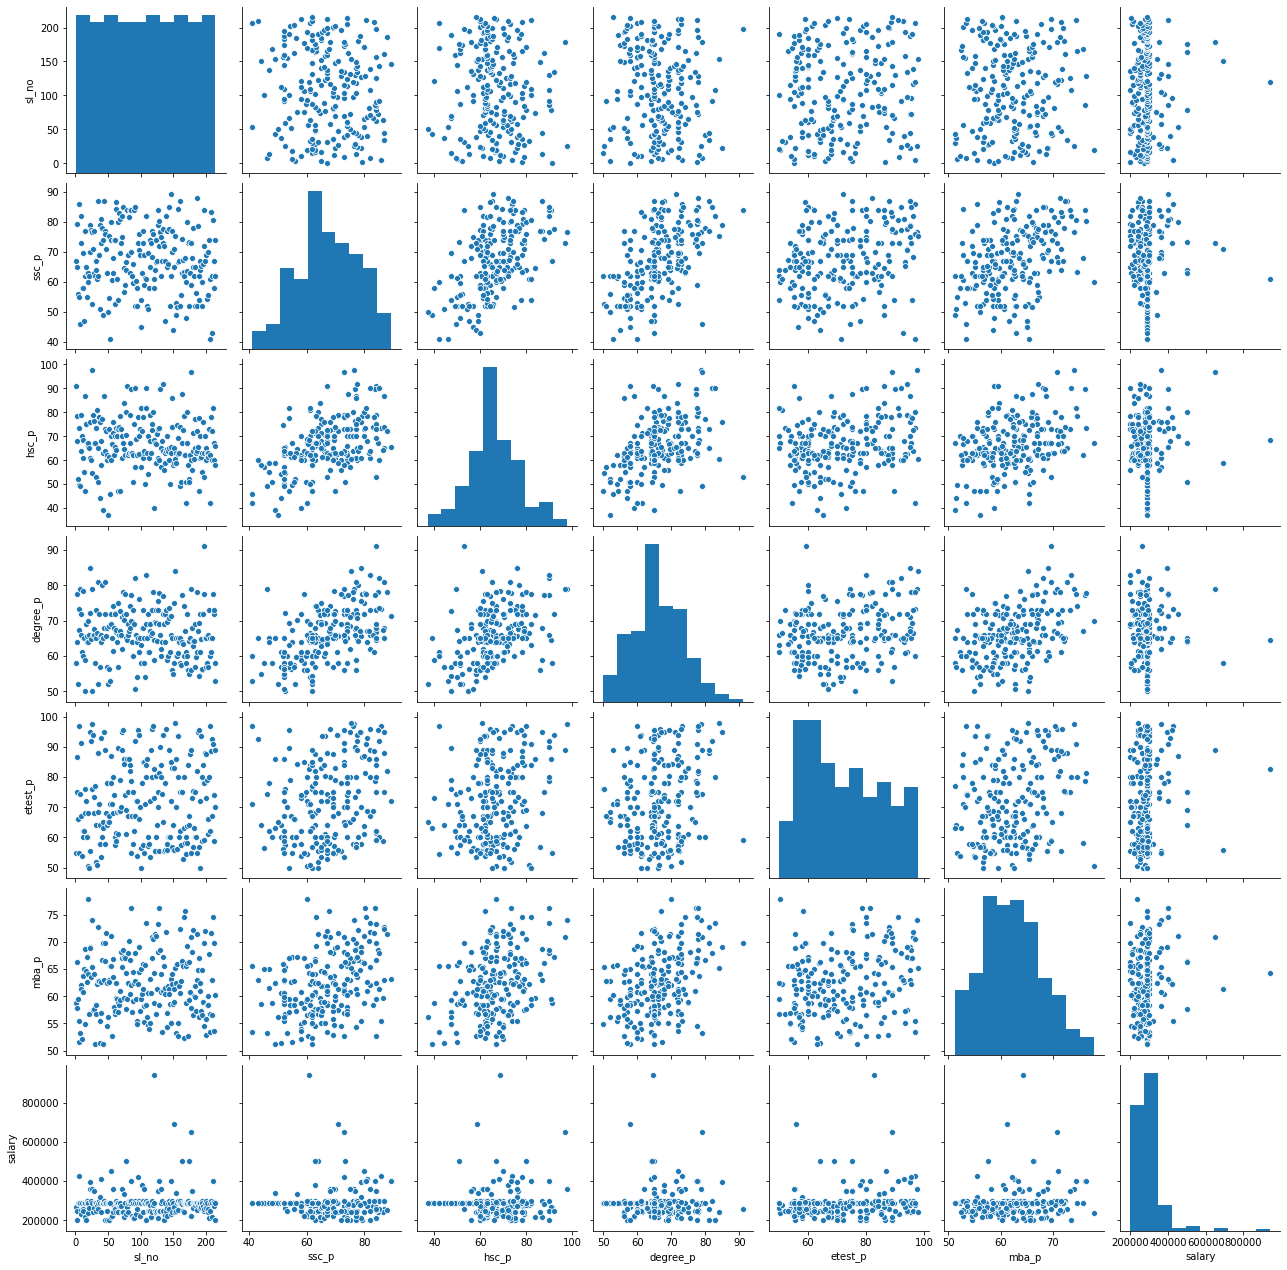

In [22]:
sns.pairplot(data)

In [35]:
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,58.00,No,55.0,58.80,Placed,270000.000000
1,2,M,79.33,Central,78.33,Others,77.48,Yes,86.5,66.28,Placed,200000.000000
2,3,M,65.00,Central,68.00,Central,64.00,No,75.0,57.80,Placed,250000.000000
3,4,M,56.00,Central,52.00,Central,52.00,No,66.0,59.43,Not Placed,288655.405405
4,5,M,85.80,Central,73.60,Central,73.30,No,96.8,55.50,Placed,425000.000000


In [38]:
data.corr()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.051550
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.023571
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.054506
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,-0.014148
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.152829
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.146324
salary,0.051550,0.023571,0.054506,-0.014148,0.152829,0.146324,1.000000


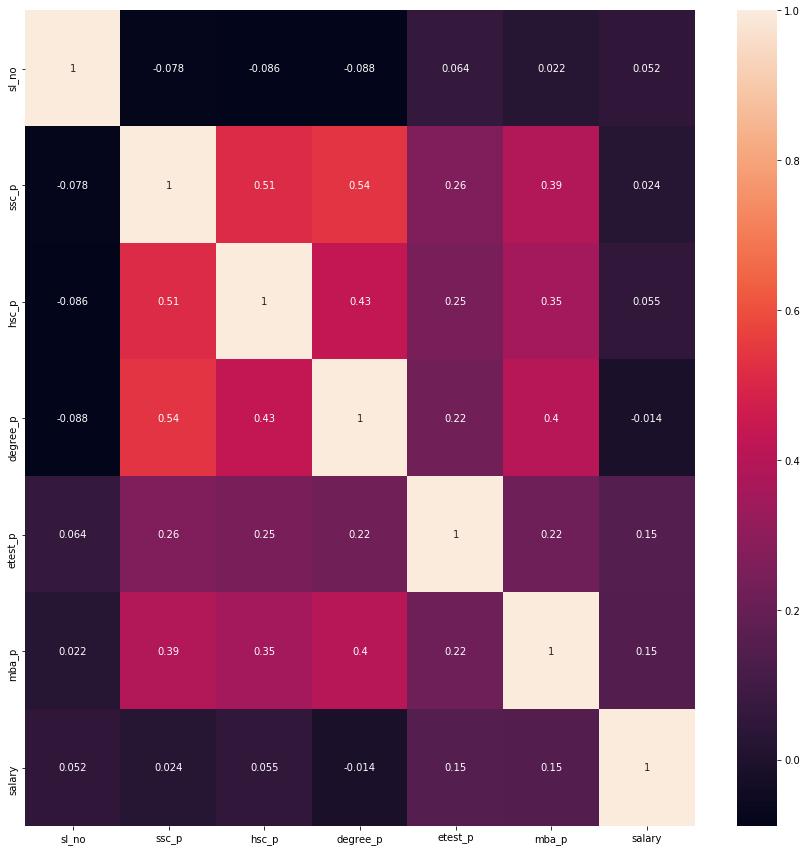

In [39]:
cor=data.corr()
fe=cor.index
plt.figure(figsize=(15,15))
g=sns.heatmap(data[fe].corr(),annot=True)

In [44]:
data=pd.get_dummies(data,drop_first=True)

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sl_no          215 non-null    int64  
 1   ssc_p          215 non-null    float64
 2   hsc_p          215 non-null    float64
 3   degree_p       215 non-null    float64
 4   etest_p        215 non-null    float64
 5   mba_p          215 non-null    float64
 6   salary         215 non-null    float64
 7   gender_M       215 non-null    uint8  
 8   ssc_b_Others   215 non-null    uint8  
 9   hsc_b_Others   215 non-null    uint8  
 10  workex_Yes     215 non-null    uint8  
 11  status_Placed  215 non-null    uint8  
dtypes: float64(6), int64(1), uint8(5)
memory usage: 12.9 KB


In [46]:
data['salary'].mean()

288655.405405405

In [47]:
data.corr()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender_M,ssc_b_Others,hsc_b_Others,workex_Yes,status_Placed
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,5.155040e-02,0.074306,0.027214,0.116887,0.059151,-2.685942e-02
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,2.357072e-02,-0.068969,0.116194,0.066996,0.175675,6.078887e-01
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,5.450558e-02,-0.021334,-0.137013,-0.019548,0.141025,4.912279e-01
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,-1.414817e-02,-0.173217,0.038070,0.067229,0.122648,4.798610e-01
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,1.528286e-01,0.084294,-0.018991,0.039108,0.056735,1.276394e-01
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,1.463245e-01,-0.300531,0.083120,0.090201,0.168811,7.692165e-02
salary,0.051550,0.023571,0.054506,-0.014148,0.152829,0.146324,1.000000e+00,0.129107,0.004603,-0.006247,0.118456,9.450535e-17
gender_M,0.074306,-0.068969,-0.021334,-0.173217,0.084294,-0.300531,1.291073e-01,1.000000,0.019429,0.065945,0.085153,9.067040e-02
ssc_b_Others,0.027214,0.116194,-0.137013,0.038070,-0.018991,0.083120,4.603322e-03,0.019429,1.000000,0.605883,-0.040744,3.729651e-02
hsc_b_Others,0.116887,0.066996,-0.019548,0.067229,0.039108,0.090201,-6.247140e-03,0.065945,0.605883,1.000000,0.038357,1.694454e-02


In [48]:
a=data['salary']


In [49]:
tset,pval=ttest_1samp(a,288655.405405405)
print(pval)
print(np.std(a))

0.9999999999999297
77277.55550312148


In [50]:
x=data.drop(['status_Placed'],axis=1)
y=data['status_Placed']

In [52]:
y.head()

0    1
1    1
2    1
3    0
4    1
Name: status_Placed, dtype: uint8

In [53]:
x.head()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender_M,ssc_b_Others,hsc_b_Others,workex_Yes
0,1,67.00,91.00,58.00,55.0,58.80,270000.000000,1,1,1,0
1,2,79.33,78.33,77.48,86.5,66.28,200000.000000,1,0,1,1
2,3,65.00,68.00,64.00,75.0,57.80,250000.000000,1,0,0,0
3,4,56.00,52.00,52.00,66.0,59.43,288655.405405,1,0,0,0
4,5,85.80,73.60,73.30,96.8,55.50,425000.000000,1,0,0,0


In [54]:

model=ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)


[0.04528534 0.21615309 0.13493845 0.14777242 0.04847221 0.06392865
 0.21139003 0.03067929 0.02686924 0.01995836 0.05455291]


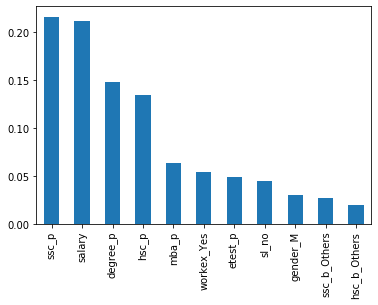

In [56]:
fet=pd.Series(model.feature_importances_,index=x.columns)
fet.nlargest(11).plot(kind='bar')
plt.show()

In [58]:
import sklearn
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.1)
print(x_train,y_train)


     sl_no  ssc_p  hsc_p  degree_p  etest_p  mba_p         salary  gender_M  \
123    124  74.00  59.00     73.00    60.00  56.70  240000.000000         1   
180    181  65.00  71.50     62.80    57.00  56.60  265000.000000         1   
52      53  40.89  45.83     53.00    71.20  65.49  288655.405405         0   
156    157  84.20  69.40     65.00    80.00  52.72  255000.000000         1   
93      94  52.00  62.00     54.00    72.00  55.41  288655.405405         1   
..     ...    ...    ...       ...      ...    ...            ...       ...   
74      75  56.60  64.80     70.20    84.27  67.20  336000.000000         1   
151    152  65.00  65.00     75.00    83.00  58.87  270000.000000         1   
27      28  63.00  67.00     66.00    68.00  57.69  265000.000000         1   
206    207  41.00  42.00     60.00    97.00  53.39  288655.405405         1   
124    125  67.00  71.00     64.33    64.00  61.26  250000.000000         1   

     ssc_b_Others  hsc_b_Others  workex_Yes  
123  

In [59]:
cls=RandomForestClassifier()
cls.fit(x_train,y_train)

pre=cls.predict(x_test)

In [60]:
pre

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0],
      dtype=uint8)

In [61]:
y_test

214    0
97     0
46     0
72     1
89     1
61     1
76     1
201    0
45     0
91     0
168    0
36     0
51     0
5      0
165    0
162    1
56     1
83     1
96     1
142    1
135    1
153    1
Name: status_Placed, dtype: uint8

In [63]:
print(metrics.accuracy_score(y_test,pre))
print(metrics.precision_score(y_test,pre))
print(metrics.recall_score(y_test,pre))
print(metrics.f1_score(y_test,pre))
print(metrics.confusion_matrix(y_test,pre))
print(metrics.classification_report(y_test,pre))

0.9090909090909091
0.9090909090909091
0.9090909090909091
0.9090909090909091
[[10  1]
 [ 1 10]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       0.91      0.91      0.91        11

    accuracy                           0.91        22
   macro avg       0.91      0.91      0.91        22
weighted avg       0.91      0.91      0.91        22



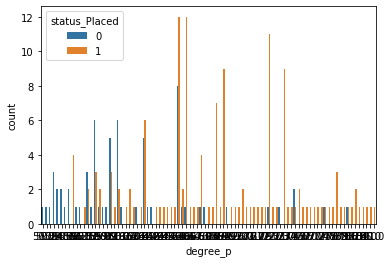

In [65]:
sns.countplot(x='degree_p',hue='status_Placed',data=data)

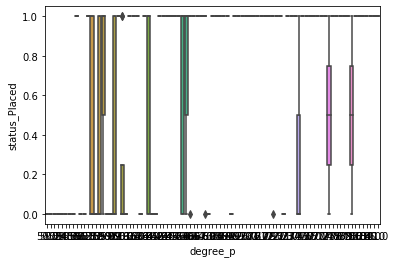

In [66]:
sns.boxplot('degree_p','status_Placed',data=data)

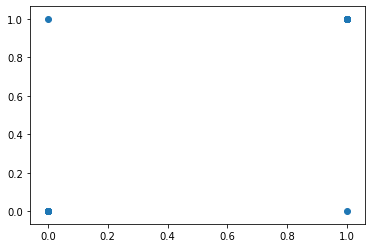

In [68]:
plt.scatter(y_test,pre)

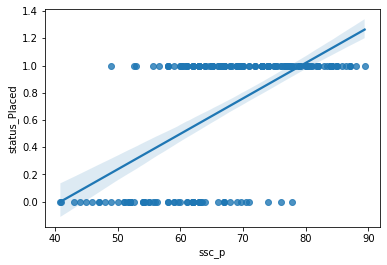

In [71]:
sns.regplot(x='ssc_p',y='status_Placed',data=data)

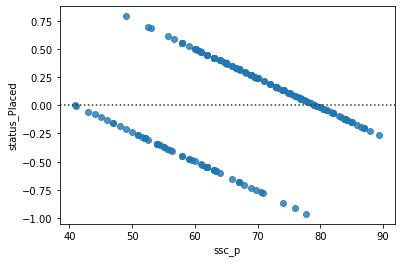

In [72]:
sns.residplot(x='ssc_p',y='status_Placed',data=data)

([<matplotlib.patches.Wedge at 0x167cab5a348>,
 [Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(2.014935239554701, 0.5916383865171708, ''),
  Text(1.3752075007598432, 1.5870741412592753, ''),
  Text(0.29886107191257116, 2.0786250406687756, ''),
  Text(-0.8723716411165633, 1.910227138268011, ''),
  Text(-0.7203468639465174, 0.8313244827396927, ''),
  Text(-1.375207649352442, 1.5870740125030496, ''),
  Text(-0.7203468639465174, 0.8313244827396927, ''),
  Text(-0.7203468639465174, 0.8313244827396927, ''),
  Text(-0.7203468639465174, 0.8313244827396927, ''),
  Text(-0.7203468639465174, 0.8313244827396927, ''),
  Text(-0.7203468639465174, 0.8313244827396927, ''),
  Text(-0.7203468639465174, 0.8313244827396927, ''),
  Text(-1.7666325059171697, 1.1353455813261535, ''),
  Text(-2.099999999999991, -1.9661618947215005e-07, ''),
  Text(-1.7666322933196894, -1.1353459121342782, ''),
  Text(-0.8723712834198046, -1.910227301622632, ''),
  Text(0.2988614611424082, -2.078624984

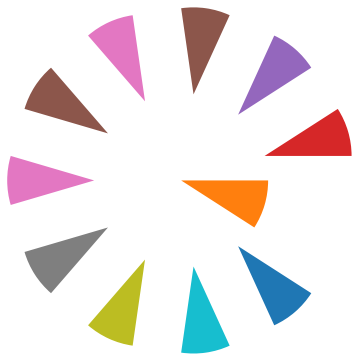

In [73]:
plt.pie(y_test,pre)